In [1]:
%%javascript
$('<div id="toc"></div>').css({position: 'fixed', top: '120px', left: 0}).appendTo(document.body);
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

from jupyterthemes import jtplot
jtplot.style()

%matplotlib inline
%load_ext autotime
%load_ext line_profiler
%matplotlib inline 

# Data Load

In [3]:
# Load data
properties_data = pd.read_csv('../Data/properties_2016.csv', low_memory=False)
# Load train data
train_data = pd.read_csv('../Data/train_2016_v2.csv')
# Elements to be forecasted - this is the framework
submission_sample = pd.read_csv('../Data/sample_submission.csv')
# Load label description and feature documentation
label_documentation = pd.read_csv('../Data/zillow_data_dictionary.csv', encoding='ISO8859_1')
# Replace null values, identify duplicates.
properties_data = properties_data.fillna(0)
transactions = pd.merge(train_data, properties_data, how='left', on=['parcelid'])
duplicate_records = train_data[train_data['parcelid'].duplicated()]['parcelid'].unique()

time: 37 s


# Visualisation

/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


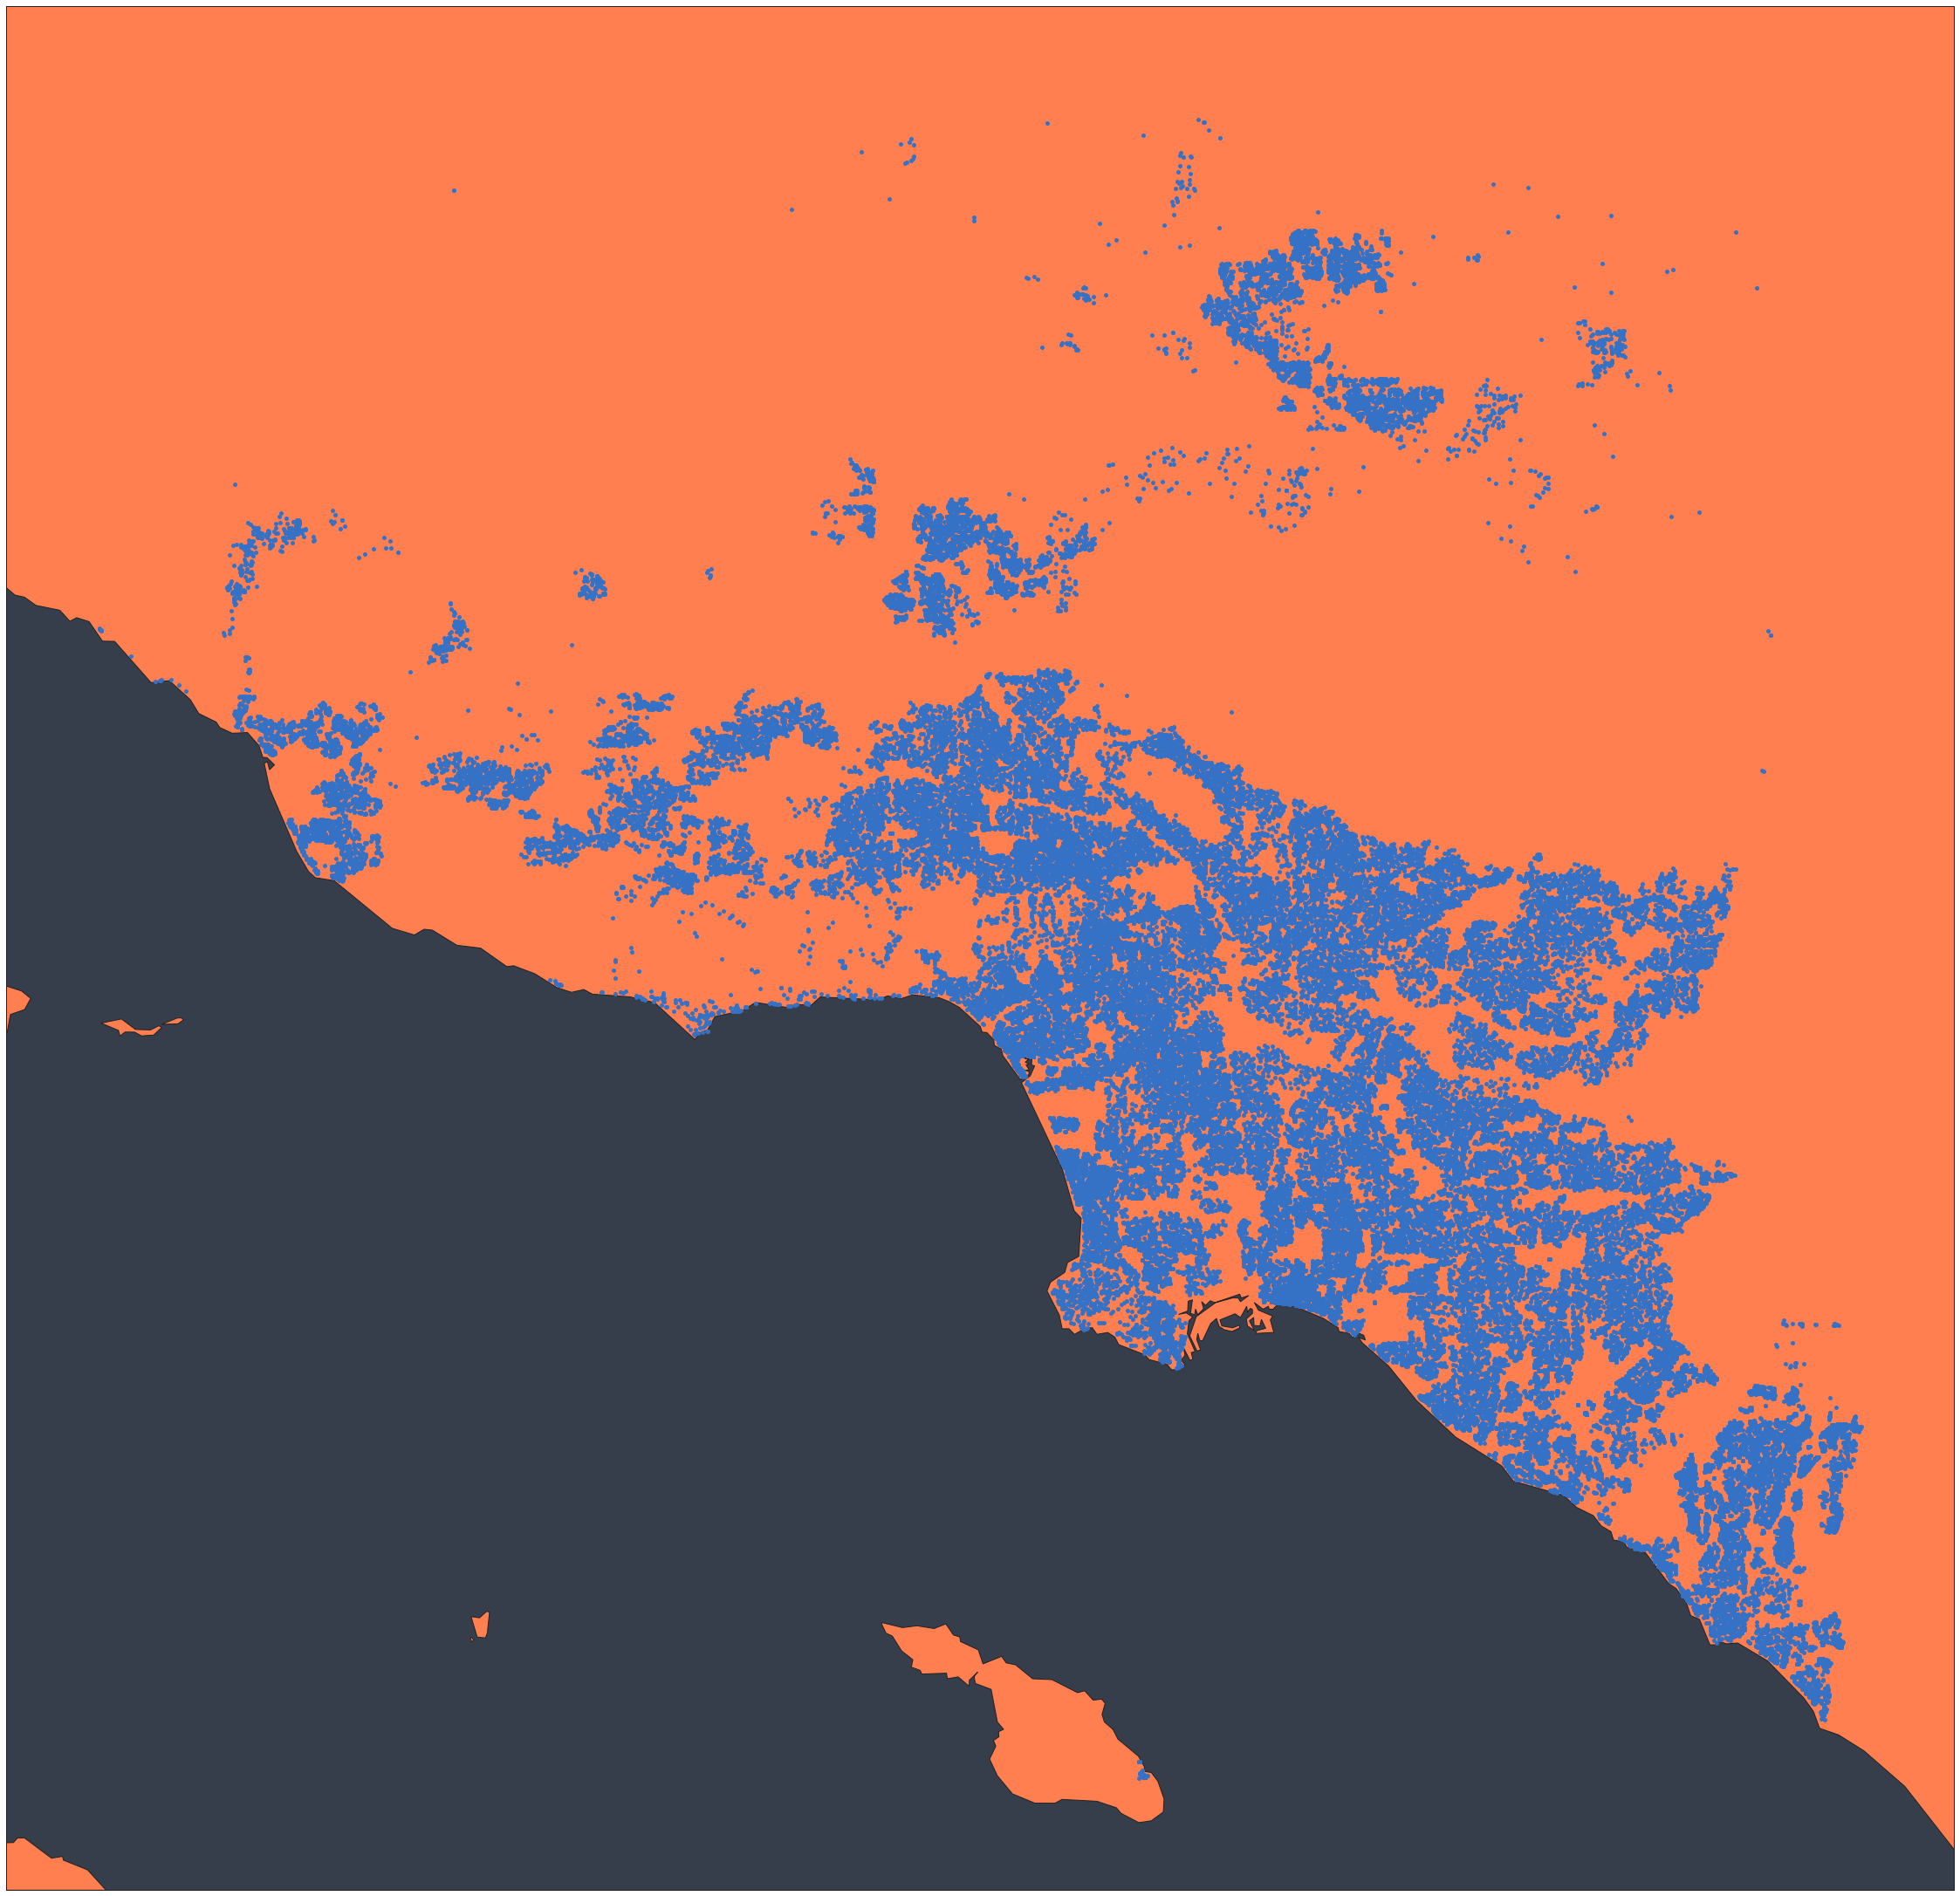

time: 23.2 s


In [4]:
transactions['latitude'] = transactions['latitude']/1000000
transactions['longitude'] = transactions['longitude']/1000000

# Get latitude and longitude extremes
min_lat = transactions['latitude'].min()
max_lat = transactions['latitude'].max()
min_lon = transactions['longitude'].min()
max_lon = transactions['longitude'].max()

# Build map
area = 0.1
fig = plt.figure(figsize=(40,40))
map = Basemap(projection='merc', lat_0 = np.mean([min_lat, max_lat]), lon_0 = np.mean([min_lon, max_lon]),
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=min_lon - area, llcrnrlat=min_lat - area,
    urcrnrlon=max_lon + area, urcrnrlat=max_lat + area)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lon = transactions['longitude'].values
lat = transactions['latitude'].values
x,y = map(lon, lat)
map.plot(x, y, 'bo', markersize=5)

In [5]:
label_documentation

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


time: 12.8 ms


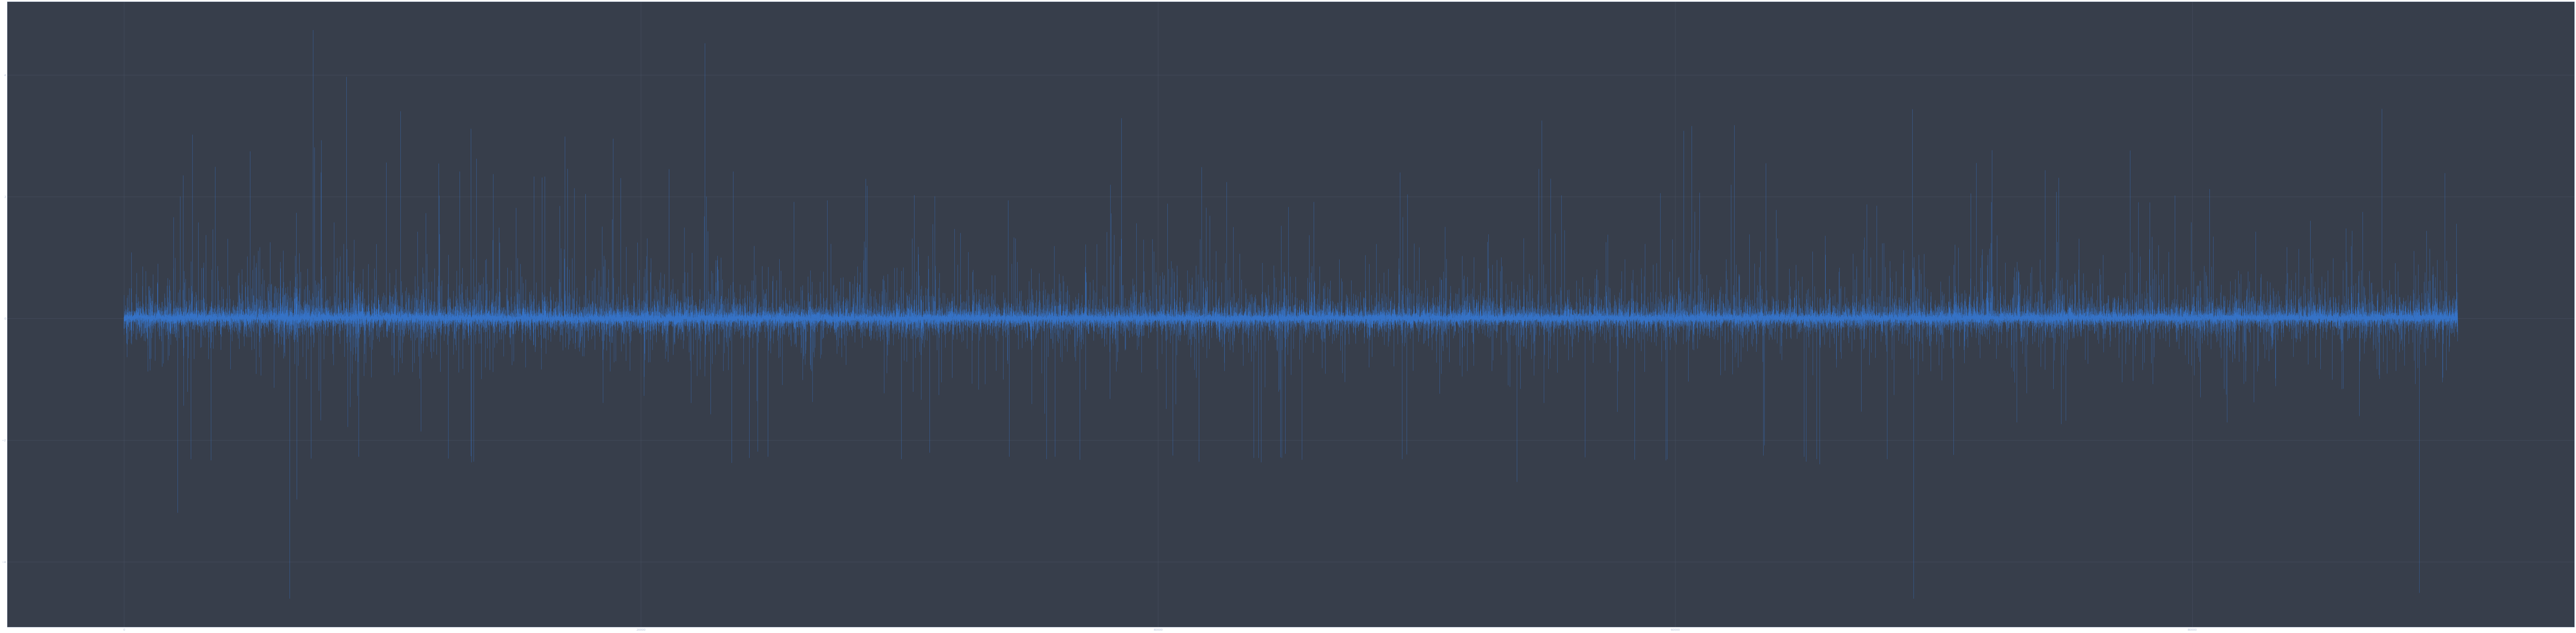

time: 11.1 s


In [6]:
fig = plt.figure(figsize=(200,50))
plt.plot(transactions['logerror'], linewidth=0.5)

# Processing

In [7]:
def plot_data(test, pred, sample, title, width=40, height=10, linewidth=0.5, color1='white', color2='orange'):
    """ Plotting method. """
    fig = plt.figure(figsize=(width, height))
    plt.plot(pred[:sample], color=color1, zorder=4, linewidth=linewidth, label='%s Prediction'%(title))
    plt.plot(test[:sample], color=color2, zorder=3, linewidth=linewidth, label='%s True Data'%(title))
    plt.title = title
    plt.legend()

time: 4.08 ms


In [108]:
# Some set of features which would intuitively make sense to be correlated with the price of the house.
# However, given that the problem is to discover areas of improvement in the model, they might not contribute
# significantly. 
temporal = ['month_of_year', 'quarter']#,'day_of_week','is_weekend']
ids      = ['storytypeid','airconditioningtypeid','buildingclasstypeid','typeconstructiontypeid',
            'architecturalstyletypeid','propertylandusetypeid','decktypeid','pooltypeid10',
            'pooltypeid2','buildingqualitytypeid','pooltypeid7','heatingorsystemtypeid']
regional = ['regionidcounty','regionidcity','fips']#'regionidzip','regionidneighborhood',
cnts     = ['bathroomcnt', 'fullbathcnt', 'bedroomcnt','threequarterbathnbr',
            'numberofstories','garagecarcnt','roomcnt','fireplacecnt','calculatedbathnbr',
            'unitcnt','poolcnt']
surfaces = ['finishedsquarefeet12', 'calculatedfinishedsquarefeet',
            'finishedsquarefeet50','basementsqft','lotsizesquarefeet',
            'finishedsquarefeet13','yardbuildingsqft17','garagetotalsqft',
            'finishedfloor1squarefeet','yardbuildingsqft26','finishedsquarefeet15',
            'poolsizesum','finishedsquarefeet6']
taxes    = ['structuretaxvaluedollarcnt','taxvaluedollarcnt','taxdelinquencyflag','taxdelinquencyyear',
            'landtaxvaluedollarcnt','taxamount']

# Columns to be binarised.
dummies = ['taxdelinquencyflag','taxdelinquencyyear'] + regional + ids
#descript = ['propertyzoningdesc']
other    = ['age']#'yearbuilt']

transactions_final_columns = temporal + ids + regional + cnts + surfaces + taxes + other

# Building time features
transactions['transactiondate'] = pd.to_datetime(transactions['transactiondate'])
transactions['day_of_week'] = transactions['transactiondate'].dt.dayofweek
transactions['month_of_year'] = transactions['transactiondate'].dt.month
transactions['quarter'] = transactions['transactiondate'].dt.quarter
transactions['is_weekend'] = (transactions['day_of_week'] < 5).astype(int)
transactions['year'] = transactions['transactiondate'].dt.year
transactions['age'] = transactions['year'] - transactions['yearbuilt']

# Feature importance based on its correlation with the 'logerror'
#corrs = transactions.corr()['logerror'].sort_values(ascending=False)

# Build train features
transactions_shuffled = transactions.sample(frac=1)
# Get sparse data
x_all = pd.get_dummies(transactions_shuffled[transactions_final_columns], columns=dummies)
y_all = transactions_shuffled['logerror'].values


new_sparse_columns = x_all.columns
# Splits up train and test based on the given ration
ratio = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_all.values, y_all, test_size=ratio, random_state=69)

time: 1.14 s


# Linear Regression

R2 LR Test: -0.00370016430883 Train: 0.0155361832979
MAE LR  Train: 0.0687819933569 Test: 0.0675078152125


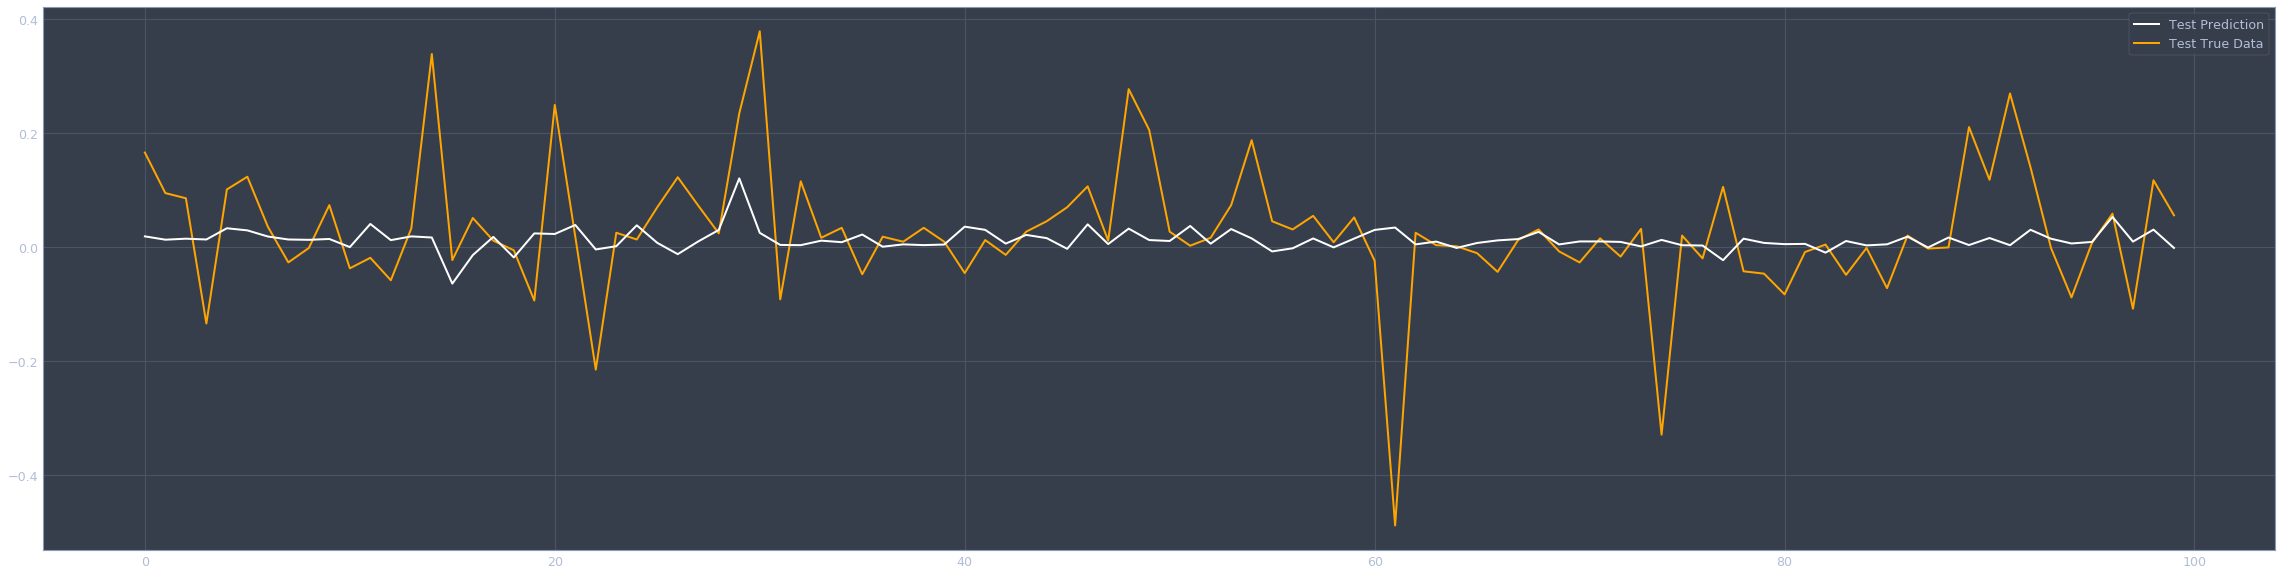

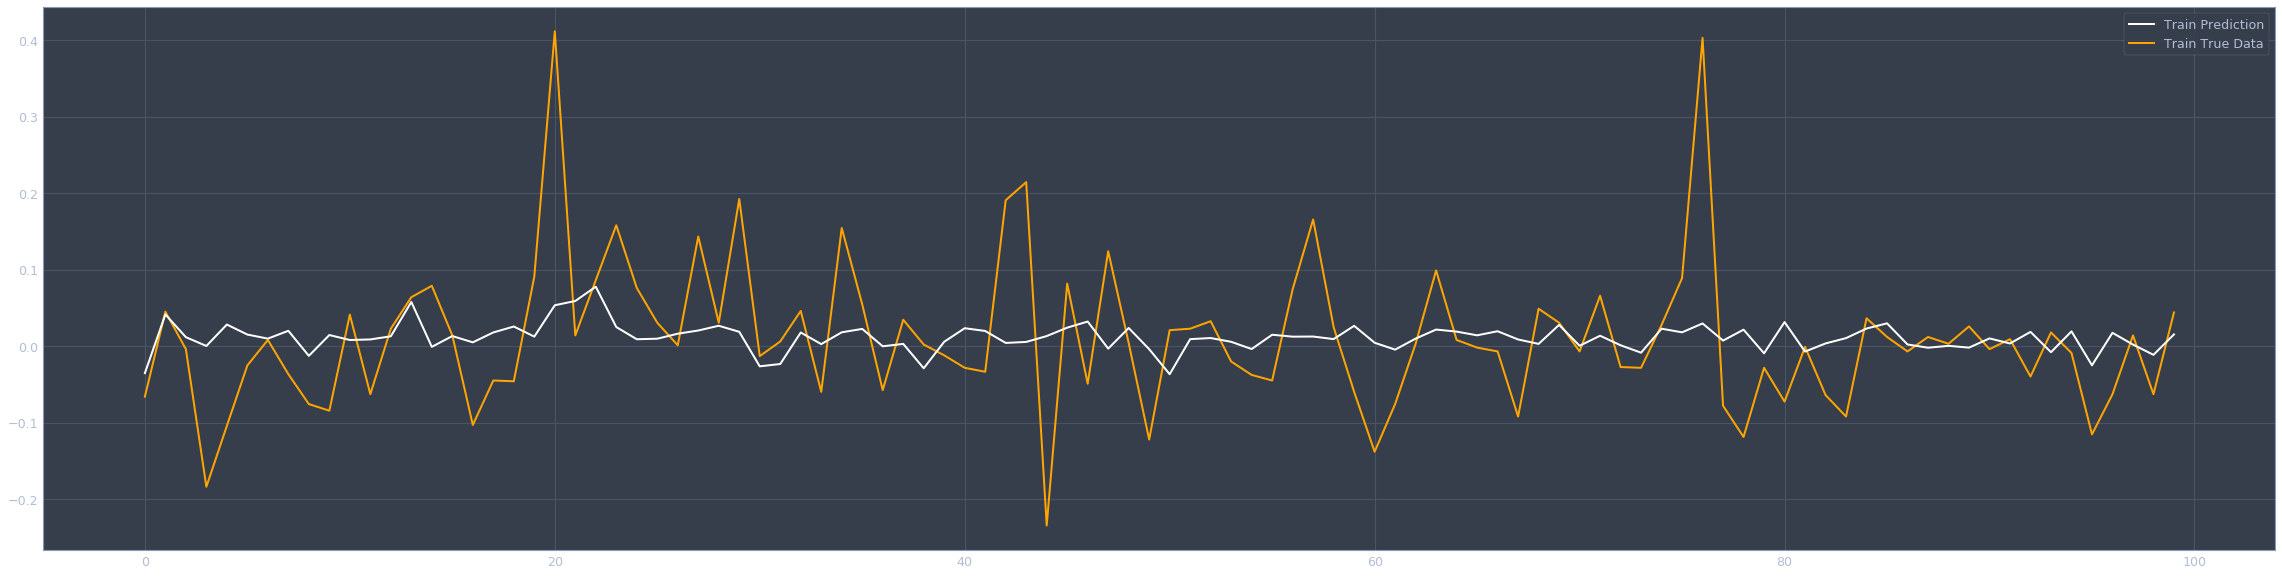

time: 2.38 s


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_lr = LinearRegression()
# Fir the model to train data
model_lr.fit(x_train, y_train)
# Make a prediction for the test set
y_pred_lr_test = model_lr.predict(x_test)
y_pred_lr_train = model_lr.predict(x_train)
# Score the predictor on the test set
model_lr.score(x_test, y_test)
# Feature importance
feature_importance_lr = pd.DataFrame(model_lr.coef_, columns=['Weight'], index=new_sparse_columns).sort_values('Weight', ascending=False)
# Same R2 computation based but based on metrics library
print('R2 LR Test:', r2_score(y_test, y_pred_lr_test), 'Train:', r2_score(y_train, y_pred_lr_train))

predicted_mae_lr_test = mean_absolute_error(y_test, y_pred_lr_test)
predicted_mae_lr_train = mean_absolute_error(y_train, y_pred_lr_train)
print('MAE LR  Train:', predicted_mae_lr_train, 'Test:',predicted_mae_lr_test)

sample = 100 # Number of records to look at - makes the visualisation more meaningful.
# Plot test true vs predicted values
plot_data(y_test, y_pred_lr_test, sample, 'Test', linewidth=2)
# Plot train true vs predicted values
plot_data(y_train, y_pred_lr_train, sample, 'Train', linewidth=2)

# XGB

In [20]:
import xgboost as xgb
from xgboost import XGBModel
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE

def plot_best_features(model, data, num_features, figsize=(5,50)):
    """ 
    Plot best features. 
    
    Args:
        model (XGBRegressor) : The best XGBRegressor estimator from GridSearchCV or other 
                               model of type XGBRegressor.
        data     (DataFrame) : Data containing all features and column names.
        
    Returns:
        dict : The newly created dictionary, which maps 'data' features to their associated score.
        
    """
    
    new_scores = {}
    # Get the XGB Model's score and assign values and keys to the new dictionary
    scores = model.booster().get_score(importance_type='weight')
    for i in scores.keys():
        new_scores[data.columns[int(i[1:])]] = scores[i]
    # Build a dataframe with the top 'num_features'
    df_features = pd.DataFrame.from_records([new_scores], index=['Features']).T.sort_values('Features').tail(num_features)
    # Plot feature significance based on the models' score
    df_features.plot.barh(figsize=figsize)
    
    return new_scores

time: 1.73 ms


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed: 11.8min remaining: 17.7min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 11.9min finished


Best estimator: XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=10, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
XGB R2 Test: -0.0135715900237 Train: 0.13302709163
MAE LR  Train: 0.0687819933569 Test: 0.0675078152125
MAE XGB Train: 0.0669039183129 Test: 0.0687189110259


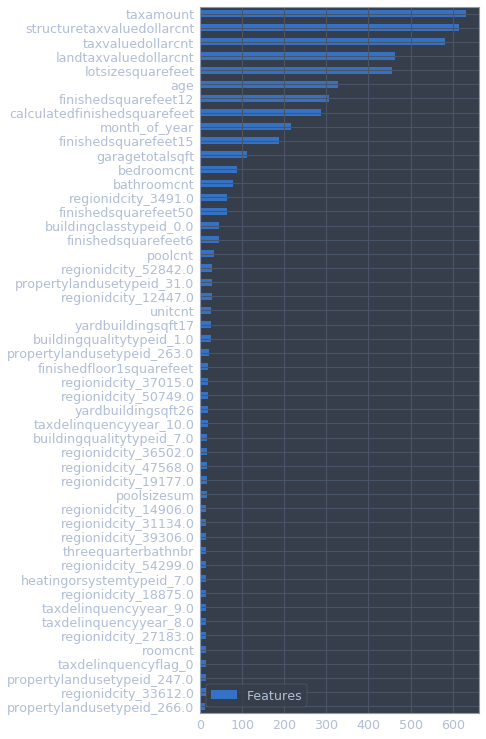

time: 20min 15s


In [113]:
cv = 5
jobs = 5
params={
    'max_depth':        [3], # shuld be 0.5 to 1% of the examples
    'subsample':        [1], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'min_child_weight': [10],
    #'colsample_bytree': [0.5], #[0.5,0.6,0.7,0.8],
    'objective':        ['reg:linear'],
    'n_estimators':     [1000], #[1000,2000,3000]
    'reg_alpha':        [0], #[0.01, 0.02, 0.03, 0.04]
    'learning_rate':    [0.1]
}

# Build XGB model based on the given parameters.
# Default features:
# max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear', 
# booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
# subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None
xgbr = xg.XGBRegressor()
xgb_gs =GridSearchCV(xgbr, params, n_jobs=jobs, 
                   cv=TimeSeriesSplit(n_splits=cv).get_n_splits([x_train,y_train]), 
                   #scoring='neg_mean_absolute_error',
                   verbose=1, refit=True)

xgb_gs.fit(x_train, y_train)
print('Best estimator:',xgb_gs.best_estimator_)
# Predict estimated logerror
y_pred_xgb_test = xgb_gs.predict(x_test)
y_pred_xgb_train = xgb_gs.predict(x_train)
# Evaluate the performance of XGB
print('XGB R2 Test:', xgb_gs.score(x_test, y_test), 'Train:', xgb_gs.score(x_train, y_train))

# Show results for LR on train and test data
print('MAE LR  Train:', predicted_mae_lr_train, 'Test:',predicted_mae_lr_test)

# Show results for XGB on train and test data
predicted_mae_xgb_test = mean_absolute_error(y_test, y_pred_xgb_test)
predicted_mae_xgb_train = mean_absolute_error(y_train, y_pred_xgb_train)
print('MAE XGB Train:', predicted_mae_xgb_train, 'Test:',predicted_mae_xgb_test)

#selector = RFE(xgb_gs.best_estimator_, 100, step=50)
#selector = selector.fit(x_train, y_train)

# plot feature importance
dict_features = plot_best_features(xgb_gs.best_estimator_, data=x_all, num_features=50, figsize=(5,13))
#xgb.to_graphviz(xgb_gs.best_estimator_, num_trees=50)

In [120]:
submission_sample.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


time: 225 ms
